In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
try:
    from sklearn.metrics import calinski_harabasz_score
except ImportError:
    from sklearn.metrics import calinski_harabasz_score


import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


FILE   = "IRIS.csv"

df = pd.read_csv( FILE, encoding="ISO-8859-1" )
TARGET = "Species"
#print( df.head() )

X = df.copy()
X = X.drop( [TARGET], axis=1 )
X = X.drop( ["SepalWidth"], axis=1 )

varNames = X.columns

#print( X.head() )
#print( X.describe() )
#print( "\n\n")

In [2]:
##
##### TRANSFROM
##
theScaler = StandardScaler()
theScaler.fit( X )

X_TRN = theScaler.transform( X )
X_TRN = pd.DataFrame( X_TRN )
#print( X_TRN.head() )
#print( "\n\n")


pca = PCA()
pca.fit( X_TRN )
X_TRN = pca.transform( X_TRN )
X_TRN = pd.DataFrame( X_TRN )

varNames_trn = []
for i in range(X_TRN.shape[1]) :
    index = str(i+1)
    newName = "PC_" + index
    varNames_trn.append( newName )

X_TRN.columns = varNames_trn
print( X_TRN.head() )
print( "\n\n")

X_TRN = X_TRN.iloc[:,0:2]
print( X_TRN.head() )
print( "\n\n")

       PC_1      PC_2      PC_3
0 -2.060360 -0.298674 -0.059476
1 -2.195981 -0.101727 -0.020166
2 -2.365221  0.080749 -0.024341
3 -2.365794  0.208165  0.082282
4 -2.128171 -0.200201 -0.039821



       PC_1      PC_2
0 -2.060360 -0.298674
1 -2.195981 -0.101727
2 -2.365221  0.080749
3 -2.365794  0.208165
4 -2.128171 -0.200201





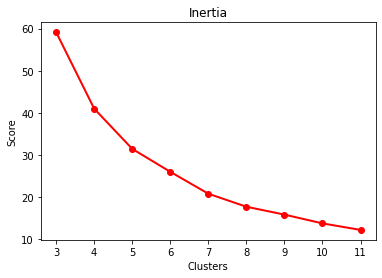

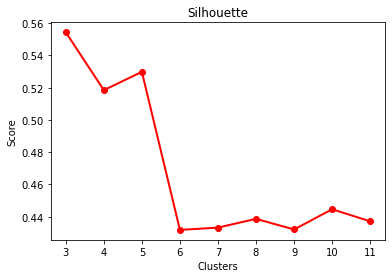

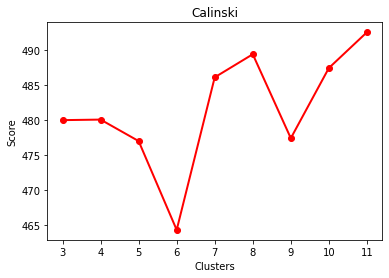





K =  3
   SepalLength  SepalWidth  PetalLength  PetalWidth Species  CLUSTER
0          5.1         3.5          1.4         0.2  setosa        2
1          4.9         3.0          1.4         0.2  setosa        2
2          4.7         3.2          1.3         0.2  setosa        2
3          4.6         3.1          1.5         0.2  setosa        2
4          5.0         3.6          1.4         0.2  setosa        2
         SepalLength  SepalWidth  PetalLength  PetalWidth
CLUSTER                                                  
0           6.853659    3.068293     5.653659    2.036585
1           5.850847    2.735593     4.386441    1.425424
2           5.006000    3.428000     1.462000    0.246000




CLUSTER  Species   
0        virginica     36
         versicolor     5
1        versicolor    45
         virginica     14
2        setosa        50
Name: Species, dtype: int64


In [4]:
K_LIST = []
I_LIST = []
S_LIST = []
C_LIST = []

for K in range(3,12) :
    km = KMeans( n_clusters=K, random_state = 1 )
    km.fit( X_TRN )
    #Y = km.predict( X_TRN )
    K_LIST.append( K )
    I_LIST.append( km.inertia_ )
    S_LIST.append( silhouette_score(X_TRN,km.labels_) )
    C_LIST.append( calinski_harabasz_score(X_TRN,km.labels_) )

def drawElbow( K, SCORE, LABEL ) :
    plt.plot( K , SCORE, 'ro-', linewidth=2)
    plt.title(LABEL)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()

drawElbow( K_LIST, I_LIST, "Inertia" )
drawElbow( K_LIST, S_LIST, "Silhouette" )
drawElbow( K_LIST, C_LIST, "Calinski" )


def clusterData( DATA, TRN_DATA, K, TARGET ) :
    print("\n\n\n")
    print("K = ",K)
    print("=======")
    km = KMeans( n_clusters=K, random_state = 1 )
    km.fit( TRN_DATA )
    Y = km.predict( TRN_DATA )
    DATA["CLUSTER"] = Y
    print( DATA.head() )

    G = DATA.groupby("CLUSTER")
    print( G.mean() )
    print("\n\n\n")
    print( G[ TARGET ].value_counts() )

clusterData( df, X_TRN, 3, TARGET )
#clusterData( df, X_TRN, 4, TARGET )
#clusterData( df, X_TRN, 5, TARGET )